In [ ]:
## THIS MODEL USING TRANSFER LEARNING TO CONSTRUCT A CNN FOR FACE RECOGNITION

In [1]:
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import optimizers
from keras import regularizers
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
conv_base = tf.keras.applications.VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(72, 96, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 72, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 72, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 36, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 36, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 36, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 24, 128)       0     

In [3]:
for i in range (10,19):
    (conv_base.layers)[i].trainable =  False

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 72, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 72, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 36, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 36, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 36, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 24, 128)       0     

In [5]:
print(len(conv_base.layers))

19


In [6]:
conv_base.layers[10]

In [7]:
inp = conv_base.input
out = conv_base.layers[9].output

In [8]:
from keras.models import Model
model2 = Model(inp, out)

In [9]:
cont = 0
for layer in model2.layers:
    cont = cont + 1
    if (cont >= 8 and cont < 11):
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 72, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 72, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 36, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 36, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 36, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 24, 128)       0     

In [ ]:
# train/val/test split (NOT RUNNING ANYMORE)
import splitfolders
# split data 
# input_folder = "../image_from_video/thermal_image"
output_folder = "../data_for_vgg16"
splitfolders.ratio("../image_from_video/thermal_image", output_folder,
    seed=1337, ratio=(.6, .2, .2), group_prefix=None, move=False) # default values

In [ ]:
# pre-processing-data (reduce noise)
# Face detection for thermal image

from PIL import Image
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import sys
import time

# crop face_image
def convert_rgb_to_gray(file_name):
    img2 = cv2.imread(file_name)
    dst = cv2.fastNlMeansDenoisingColored(img2,None,10,10,7,21)
    cv2.imwrite(file_name, dst)
    print(" Complete convert: " + file_name + "\n")

# make directory store all processed image
def data_processing(folder_names, path):
    for folder_name in folder_names:
        folder_path = path + folder_name
        file_names = os.listdir(folder_path)
        
        for file in file_names:
            image_dir = folder_path + "/" + file
            convert_rgb_to_gray(image_dir)

In [ ]:
path = "../data_for_vgg16/test/"
folder_names = os.listdir(path)
data_processing(folder_names, path)

In [11]:
#Copying images to training, validation, and test directories
import os, shutil
import numpy as np
#Path where my dataset is stored
base_dir = 'C:/Users/vuduc/data_for_vgg16/'


# Directories for the training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
print(validation_dir)
print(train_dir)

C:/Users/vuduc/data_for_vgg16/val
C:/Users/vuduc/data_for_vgg16/train


In [12]:
from keras import layers
from keras import models

model = Sequential()
model.add(model2)
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(19, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 18, 24, 256)       1735488   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 12, 256)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 12, 256)       1024      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 27648)             0         
                                                                 
 dense (Dense)               (None, 19)                525331    
                                                                 
Total params: 2,261,843
Trainable params: 2,001,171
Non-

In [13]:
#Compilation stage
from tensorflow.keras import optimizers
learning_rate = 1e-4
momentum = 0.9

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6), #Decrease learning rate
              metrics=['accuracy'])

In [14]:
#Using ImageDataGenerator to read images from directories

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size= 32,
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical')

Found 4560 images belonging to 19 classes.
Found 1520 images belonging to 19 classes.


In [15]:
#Training and validation stages
history = model.fit(
      train_generator,
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=30)

Epoch 1/10
143/143 [==============================] - 213s 1s/step - loss: 0.3224 - accuracy: 0.9081 - val_loss: 0.0355 - val_accuracy: 0.9917
Epoch 2/10
143/143 [==============================] - 220s 2s/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.0122 - val_accuracy: 0.9958
Epoch 3/10
143/143 [==============================] - 220s 2s/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0074 - val_accuracy: 0.9990
Epoch 4/10
143/143 [==============================] - 222s 2s/step - loss: 2.1787e-04 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9958
Epoch 5/10
143/143 [==============================] - 222s 2s/step - loss: 1.2793e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 6/10
143/143 [==============================] - 227s 2s/step - loss: 2.8911e-04 - accuracy: 0.9998 - val_loss: 9.0042e-04 - val_accuracy: 1.0000
Epoch 7/10
143/143 [==============================] - 228s 2s/step - loss: 3.2088e-06 - accuracy: 1.0000 - val_loss: 0.0074 - 

In [19]:
model.save_weights("thermal_net_weight.h5")

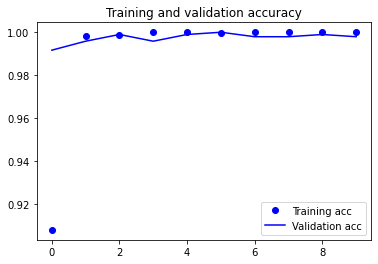

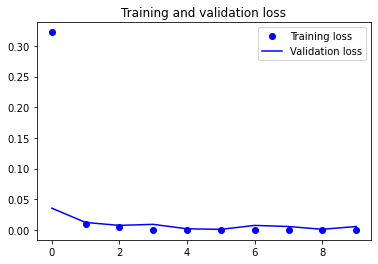

In [17]:
#Plot of the loss and accuracy during training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=64,
        color_mode='rgb',
        class_mode='categorical')

start_time = time.time()
test_loss, test_acc = model.evaluate(test_generator, steps = 30)
end_time = time.time()
testing_time = end_time - start_time
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 1521 images belonging to 19 classes.
30/30 [==============================] - 26s 881ms/step - loss: 0.0057 - accuracy: 0.9980
test acc: 0.9980276226997375
test loss: 0.005719922017306089


In [1]:
## loading pre_trained thermal face detection model

In [68]:
import numpy as np
import tensorflow as tf
import cv2
from keras.preprocessing.image import load_img, img_to_array

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="thermal_face_automl_edge_fast.tflite")
interpreter.allocate_tensors()

# # Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# floating_model = input_details[0]['dtype'] == np.float32
input_height = input_details[0]['shape'][1]
input_width = input_details[0]['shape'][2]

img = Image.open(r"C:\Users\vuduc\data_for_vgg16\train\doan_thi_linh_chi\frame301.jpg").resize((input_width, input_height))
input_data = np.expand_dims(img, axis=0)
if floating_model:
    input_data = (np.float32(input_data) - 127.5) / 127.5

# input_data = input_data.astype(np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
boxes = interpreter.get_tensor(output_details[0]['index'])
labels = interpreter.get_tensor(output_details[1]['index'])
confidences = interpreter.get_tensor(output_details[2]['index'])
nboxes = interpreter.get_tensor(output_details[3]['index'])
print(boxes)

maxindex = np.argmax(confidences[0])
box = boxes[0][maxindex] * 192
print(box)
cropped = img.crop(box)
cropped.show()

[[[0.43518955 0.34212652 0.8371851  0.5309929 ]
  [0.01097424 0.9156117  0.30552214 0.99475485]
  [0.02547251 0.88926977 0.27351287 0.98370296]
  ...
  [0.9448726  0.23098704 0.98879504 0.36345097]
  [0.9209424  0.4194586  0.9960816  0.51616687]
  [0.91791433 0.41644502 1.0031782  0.7239033 ]]]
[ 83.5564   65.68829 160.73953 101.95064]


In [73]:
from imutils import face_utils
from imutils import paths
import numpy as np
import imutils
import argparse 
import imutils
import time
import cv2
import os 

ModuleNotFoundError: No module named 'dlib'